<a href="https://colab.research.google.com/github/Kishan-Sinha/Campus_placement_Predictor/blob/main/Code_For_Pre_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# loading the dataframe

import pandas as pd

df = pd.read_csv("/content/sample_data/students.csv")

# Reading column names

df.columns

Index(['Student ID', 'Name', 'Age', 'Gender', 'Branch', 'Average GPA',
       'Backlogs', 'Attendance (%)', 'Clubs', 'Skills', 'Internship Done',
       'Internship Domain', 'Placement Status', 'Placement Domain',
       'CTC (LPA)', 'Alumni Path', 'Sem1 GPA', 'Sem2 GPA', 'Sem3 GPA',
       'Sem4 GPA', 'Sem5 GPA', 'Sem6 GPA', 'Sem7 GPA', 'Sem8 GPA'],
      dtype='object')

In [ ]:
# dropping all columns except key variables

columns_to_keep = ['Age', 'Gender', 'Average GPA', 'Backlogs', 'Attendance (%)', 'Clubs', 'Skills', 'Internship Done', 'Internship Domain', 'Placement Status']

df_filtered = df[columns_to_keep]

df_filtered

,Age,Gender,Average GPA,Backlogs,Attendance (%),Clubs,Skills,Internship Done,Internship Domain,Placement Status
0,21.0,Male,6.99,0.0,70.45,"Literary Society, Robotics","C++, Machine Learning, Python, Java",Yes,Consulting,Not Placed
1,19.0,Male,6.46,0.0,65.45,"Literary Society, Coding Club","C++, SQL, Web Development",No,NaN,Not Placed
2,19.0,Female,7.08,0.0,84.79,Literary Society,"Data Science, SQL, Machine Learning",Yes,Research,Not Placed
3,23.0,Male,6.92,2.0,62.26,"Coding Club, Entrepreneurship Cell","Python, SQL, Java",No,NaN,Placed
4,20.0,Male,7.09,0.0,97.12,Robotics,"C++, SQL, Java, Python",Yes,Higher Studies,Not Placed
...,...,...,...,...,...,...,...,...,...,...
1995,19.0,Male,7.69,2.0,92.45,"Cultural Club, Robotics, Entrepreneurship Cell","Java, Web Development, C++, SQL, Data Science",Yes,Software,Not Placed
1996,23.0,Female,7.25,0.0,96.35,"Entrepreneurship Cell, Literary Society","SQL, Machine Learning, Data Science, Java",No,NaN,Not Placed
1997,18.0,Male,6.92,0.0,75.32,"Literary Society, Sports Club","Web Development, Data Science, SQL",Yes,Consulting,Not Placed
1998,22.0,Male,7.09,0.0,94.20,"Entrepreneurship Cell, Cultural Club, Sports Club","Data Science, C++, SQL, Python, Java",Yes,Consulting,Placed


In [ ]:
# checking for nan values

df_filtered.isna().sum()

,0
Age,1
Gender,1
Average GPA,1
Backlogs,1
Attendance (%),1
Clubs,1
Skills,1
Internship Done,1
Internship Domain,1018
Placement Status,1


In [ ]:
# reviewing all the rows that have atleast on nan value

df_filtered[df_filtered.isna().any(axis = 1)]

,Age,Gender,Average GPA,Backlogs,Attendance (%),Clubs,Skills,Internship Done,Internship Domain,Placement Status
1,19.0,Male,6.46,0.0,65.45,"Literary Society, Coding Club","C++, SQL, Web Development",No,NaN,Not Placed
3,23.0,Male,6.92,2.0,62.26,"Coding Club, Entrepreneurship Cell","Python, SQL, Java",No,NaN,Placed
6,18.0,Female,7.06,2.0,82.62,"Entrepreneurship Cell, Robotics, Cultural Club","Web Development, C++, Machine Learning",No,NaN,Not Placed
8,18.0,Male,7.34,1.0,74.15,"Entrepreneurship Cell, Literary Society, Cultu...","Python, SQL, C++, Web Development, Java",No,NaN,Not Placed
12,23.0,Female,7.50,1.0,99.10,"Coding Club, Robotics, Sports Club","Java, Python, Web Development, Data Science, C++",No,NaN,Placed
...,...,...,...,...,...,...,...,...,...,...
1983,19.0,Female,7.12,1.0,89.12,"Sports Club, Coding Club, Cultural Club","Java, Web Development, C++",No,NaN,Not Placed
1989,20.0,Female,7.46,0.0,76.28,"Coding Club, Literary Society","Java, Machine Learning",No,NaN,Placed
1993,21.0,Male,6.96,1.0,79.94,"Robotics, Sports Club, Coding Club","C++, Python, Machine Learning",No,NaN,Not Placed
1996,23.0,Female,7.25,0.0,96.35,"Entrepreneurship Cell, Literary Society","SQL, Machine Learning, Data Science, Java",No,NaN,Not Placed


**As you can see in the above table, the Nan values in the column "internship domain" almost completely corresponds to the "no" value in the adjacent column "internship done", which implies that Nan values in the "internship done" column is due to the students who have not done any internships, so we can simply replace the nan cells in that column with the string "None"**

In [ ]:
# applying Condition to impute nan values in 'Internship Domain' column

df_filtered.loc[df_filtered['Internship Done']=='No','Internship Domain'] = 'None'

# rechecking for nan rows

print(df_filtered.isna().sum())
df_filtered[df_filtered.isna().any(axis = 1)]

Age                  1
Gender               1
Average GPA          1
Backlogs             1
Attendance (%)       1
Clubs                1
Skills               1
Internship Done      1
Internship Domain    1
Placement Status     1
dtype: int64


,Age,Gender,Average GPA,Backlogs,Attendance (%),Clubs,Skills,Internship Done,Internship Domain,Placement Status
863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**As it can be seen that the above row has all of attributes missing, so we will consider this instance as inconsistent and remove it from the dataset**

In [ ]:
# Dropping inconsistent row

df_filtered = df_filtered.dropna()

print(df_filtered.isna().sum())

df_filtered

Age                  0
Gender               0
Average GPA          0
Backlogs             0
Attendance (%)       0
Clubs                0
Skills               0
Internship Done      0
Internship Domain    0
Placement Status     0
dtype: int64


,Age,Gender,Average GPA,Backlogs,Attendance (%),Clubs,Skills,Internship Done,Internship Domain,Placement Status
0,21.0,Male,6.99,0.0,70.45,"Literary Society, Robotics","C++, Machine Learning, Python, Java",Yes,Consulting,Not Placed
1,19.0,Male,6.46,0.0,65.45,"Literary Society, Coding Club","C++, SQL, Web Development",No,None,Not Placed
2,19.0,Female,7.08,0.0,84.79,Literary Society,"Data Science, SQL, Machine Learning",Yes,Research,Not Placed
3,23.0,Male,6.92,2.0,62.26,"Coding Club, Entrepreneurship Cell","Python, SQL, Java",No,None,Placed
4,20.0,Male,7.09,0.0,97.12,Robotics,"C++, SQL, Java, Python",Yes,Higher Studies,Not Placed
...,...,...,...,...,...,...,...,...,...,...
1995,19.0,Male,7.69,2.0,92.45,"Cultural Club, Robotics, Entrepreneurship Cell","Java, Web Development, C++, SQL, Data Science",Yes,Software,Not Placed
1996,23.0,Female,7.25,0.0,96.35,"Entrepreneurship Cell, Literary Society","SQL, Machine Learning, Data Science, Java",No,None,Not Placed
1997,18.0,Male,6.92,0.0,75.32,"Literary Society, Sports Club","Web Development, Data Science, SQL",Yes,Consulting,Not Placed
1998,22.0,Male,7.09,0.0,94.20,"Entrepreneurship Cell, Cultural Club, Sports Club","Data Science, C++, SQL, Python, Java",Yes,Consulting,Placed


**Now we will process the two columns 'clubs' and 'skills' and extract all comma separated values from each of its cells. After which we will concat binary columns to the dataset for each of those values. This is to be done so that each value can have its individual impact on the result**

In [ ]:
# Step 1: Define a function to extract unique values from a column

def extract_unique_items(df, column):
    return set(item.strip() for sublist in df[column].dropna().str.split(',') for item in sublist)

# Step 2: Get all unique clubs and skills

unique_clubs = extract_unique_items(df_filtered, 'Clubs')
unique_skills = extract_unique_items(df_filtered, 'Skills')

# Step 3: Create binary columns for clubs

for club in unique_clubs:
    df_filtered[f'In_{club}'] = df_filtered['Clubs'].apply(lambda x: int(club in x) if pd.notnull(x) else 0)

# Step 4: Create binary columns for skills

for skill in unique_skills:
    df_filtered[f'Knows_{skill}'] = df_filtered['Skills'].apply(lambda x: int(skill in x) if pd.notnull(x) else 0)


/tmp/ipython-input-7-681345183.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'In_{club}'] = df_filtered['Clubs'].apply(lambda x: int(club in x) if pd.notnull(x) else 0)
/tmp/ipython-input-7-681345183.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[f'In_{club}'] = df_filtered['Clubs'].apply(lambda x: int(club in x) if pd.notnull(x) else 0)
/tmp/ipython-input-7-681345183.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [ ]:
# hot encode 'Internship Domain' column

df_filtered = pd.get_dummies(df_filtered, columns=['Internship Domain'], prefix='Domain', dummy_na=False)

df_filtered

,Age,Gender,Average GPA,Backlogs,Attendance (%),Clubs,Skills,Internship Done,Placement Status,In_Literary Society,...,Knows_Web Development,Knows_Java,Knows_Python,Domain_Consulting,Domain_Core Engineering,Domain_Hardware,Domain_Higher Studies,Domain_None,Domain_Research,Domain_Software
0,21.0,Male,6.99,0.0,70.45,"Literary Society, Robotics","C++, Machine Learning, Python, Java",Yes,Not Placed,1,...,0,1,1,True,False,False,False,False,False,False
1,19.0,Male,6.46,0.0,65.45,"Literary Society, Coding Club","C++, SQL, Web Development",No,Not Placed,1,...,1,0,0,False,False,False,False,True,False,False
2,19.0,Female,7.08,0.0,84.79,Literary Society,"Data Science, SQL, Machine Learning",Yes,Not Placed,1,...,0,0,0,False,False,False,False,False,True,False
3,23.0,Male,6.92,2.0,62.26,"Coding Club, Entrepreneurship Cell","Python, SQL, Java",No,Placed,0,...,0,1,1,False,False,False,False,True,False,False
4,20.0,Male,7.09,0.0,97.12,Robotics,"C++, SQL, Java, Python",Yes,Not Placed,0,...,0,1,1,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,19.0,Male,7.69,2.0,92.45,"Cultural Club, Robotics, Entrepreneurship Cell","Java, Web Development, C++, SQL, Data Science",Yes,Not Placed,0,...,1,1,0,False,False,False,False,False,False,True
1996,23.0,Female,7.25,0.0,96.35,"Entrepreneurship Cell, Literary Society","SQL, Machine Learning, Data Science, Java",No,Not Placed,1,...,0,1,0,False,False,False,False,True,False,False
1997,18.0,Male,6.92,0.0,75.32,"Literary Society, Sports Club","Web Development, Data Science, SQL",Yes,Not Placed,1,...,1,0,0,True,False,False,False,False,False,False
1998,22.0,Male,7.09,0.0,94.20,"Entrepreneurship Cell, Cultural Club, Sports Club","Data Science, C++, SQL, Python, Java",Yes,Placed,0,...,0,1,1,True,False,False,False,False,False,False


In [ ]:
# Dropping the 2 columns "Clubs" , "Skills" after encoding

df_filtered.drop(['Skills','Clubs'],axis =1,inplace = True)

In [ ]:
#  calculating cramer's v correlation between all the binary variables

import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * min(r - 1, k - 1)))

# Identify binary columns

binary_cols = [col for col in df_filtered.columns if df_filtered[col].nunique() == 2]

# Calculate Cramer's V for all pairs of binary columns

cramer_matrix = pd.DataFrame(index=binary_cols, columns=binary_cols, dtype=float)

for col1 in binary_cols:
    for col2 in binary_cols:
        if col1 != col2:
            confusion_matrix = pd.crosstab(df_filtered[col1], df_filtered[col2])
            cramer_matrix.loc[col1, col2] = cramers_v(confusion_matrix)
        else:
            cramer_matrix.loc[col1, col2] = 1.0  # Correlation with itself is 1

# Display the Cramer's V matrix
print("Cramer's V Correlation Matrix for Binary Variables:")
cramer_matrix

Cramer's V Correlation Matrix for Binary Variables:


,Gender,Internship Done,Placement Status,In_Literary Society,In_Cultural Club,In_Entrepreneurship Cell,In_Coding Club,In_Robotics,In_Sports Club,Knows_C++,...,Knows_Web Development,Knows_Java,Knows_Python,Domain_Consulting,Domain_Core Engineering,Domain_Hardware,Domain_Higher Studies,Domain_None,Domain_Research,Domain_Software
Gender,1.000000,0.002405,0.012692,0.025073,0.042242,0.001379,0.006800,0.012996,0.002181,0.026854,...,0.002081,0.021623,0.018523,0.000000,0.024549,0.008865,0.020744,0.002405,0.011722,0.000000
Internship Done,0.002405,1.000000,0.050991,0.023124,0.029296,0.043176,0.038874,0.059438,0.025552,0.020590,...,0.015199,0.000159,0.068589,0.309465,0.284793,0.261891,0.322292,0.998999,0.344234,0.284793
Placement Status,0.012692,0.050991,1.000000,0.042190,0.012059,0.019973,0.009977,0.052973,0.017650,0.050856,...,0.027089,0.068950,0.014434,0.052900,0.009166,0.002259,0.022537,0.050991,0.002085,0.055187
In_Literary Society,0.025073,0.023124,0.042190,1.000000,0.155123,0.120203,0.122921,0.046407,0.017663,0.032768,...,0.047304,0.002908,0.008769,0.013534,0.000000,0.027376,0.021925,0.023124,0.049189,0.002301
In_Cultural Club,0.042242,0.029296,0.012059,0.155123,1.000000,0.103389,0.112480,0.132260,0.089992,0.019173,...,0.036127,0.027839,0.000000,0.078101,0.010225,0.003543,0.022863,0.029296,0.025052,0.066605
In_Entrepreneurship Cell,0.001379,0.043176,0.019973,0.120203,0.103389,1.000000,0.102266,0.119604,0.127229,0.042042,...,0.047684,0.031892,0.003515,0.037920,0.052404,0.031125,0.064635,0.043176,0.028107,0.024680
In_Coding Club,0.006800,0.038874,0.009977,0.122921,0.112480,0.102266,1.000000,0.095366,0.047119,0.036076,...,0.013826,0.071173,0.019550,0.017902,0.021161,0.013534,0.029376,0.038874,0.040315,0.007400
In_Robotics,0.012996,0.059438,0.052973,0.046407,0.132260,0.119604,0.095366,1.000000,0.091883,0.000854,...,0.017335,0.026271,0.076492,0.031170,0.049188,0.000201,0.027923,0.059438,0.002092,0.000000
In_Sports Club,0.002181,0.025552,0.017650,0.017663,0.089992,0.127229,0.047119,0.091883,1.000000,0.067783,...,0.076650,0.027309,0.010681,0.013746,0.008869,0.015844,0.017874,0.025552,0.016719,0.004866
Knows_C++,0.026854,0.020590,0.050856,0.032768,0.019173,0.042042,0.036076,0.000854,0.067783,1.000000,...,0.009321,0.036516,0.029695,0.034615,0.007648,0.028595,0.019120,0.020590,0.020904,0.011487


In [ ]:
# FEATURE ENGINEERING:
# concatenating a new binary column to the dataset by the name 'Extracirricular Activities' that combines the
# information of three other columns 'In_Cultural Club_club','In_Literary Society_club','In_Sports Club_club'

df_filtered = df_filtered.copy()

df_filtered['Extracirricular Activities'] = df_filtered[['In_Cultural Club', 'In_Literary Society', 'In_Sports Club']].sum(axis=1).apply(lambda x: 1 if x >= 1 else 0)


In [ ]:
# Rechecking the correlation values with new 'Extracirricular Activities' column included this time

binary_cols2 = [col for col in df_filtered.columns if df_filtered[col].nunique() == 2]

cramer_matrix2 = pd.DataFrame(index=binary_cols, columns=binary_cols, dtype=float)

for col1 in binary_cols2:
    for col2 in binary_cols2:
        if col1 != col2:
            confusion_matrix = pd.crosstab(df_filtered[col1], df_filtered[col2])
            cramer_matrix2.loc[col1, col2] = cramers_v(confusion_matrix)
        else:
            cramer_matrix2.loc[col1, col2] = 1.0  # Correlation with itself is 1

print("Cramer's V Correlation Matrix for Binary Variables:")
cramer_matrix2

Cramer's V Correlation Matrix for Binary Variables:


,Gender,Internship Done,Placement Status,In_Literary Society,In_Cultural Club,In_Entrepreneurship Cell,In_Coding Club,In_Robotics,In_Sports Club,Knows_C++,...,Knows_Java,Knows_Python,Domain_Consulting,Domain_Core Engineering,Domain_Hardware,Domain_Higher Studies,Domain_None,Domain_Research,Domain_Software,Extracirricular Activities
Gender,1.000000,0.002405,0.012692,0.025073,0.042242,0.001379,0.006800,0.012996,0.002181,0.026854,...,0.021623,0.018523,0.000000,0.024549,0.008865,0.020744,0.002405,0.011722,0.000000,0.031248
Internship Done,0.002405,1.000000,0.050991,0.023124,0.029296,0.043176,0.038874,0.059438,0.025552,0.020590,...,0.000159,0.068589,0.309465,0.284793,0.261891,0.322292,0.998999,0.344234,0.284793,0.025411
Placement Status,0.012692,0.050991,1.000000,0.042190,0.012059,0.019973,0.009977,0.052973,0.017650,0.050856,...,0.068950,0.014434,0.052900,0.009166,0.002259,0.022537,0.050991,0.002085,0.055187,0.062835
In_Literary Society,0.025073,0.023124,0.042190,1.000000,0.155123,0.120203,0.122921,0.046407,0.017663,0.032768,...,0.002908,0.008769,0.013534,0.000000,0.027376,0.021925,0.023124,0.049189,0.002301,0.400274
In_Cultural Club,0.042242,0.029296,0.012059,0.155123,1.000000,0.103389,0.112480,0.132260,0.089992,0.019173,...,0.027839,0.000000,0.078101,0.010225,0.003543,0.022863,0.029296,0.025052,0.066605,0.406567
In_Entrepreneurship Cell,0.001379,0.043176,0.019973,0.120203,0.103389,1.000000,0.102266,0.119604,0.127229,0.042042,...,0.031892,0.003515,0.037920,0.052404,0.031125,0.064635,0.043176,0.028107,0.024680,0.214028
In_Coding Club,0.006800,0.038874,0.009977,0.122921,0.112480,0.102266,1.000000,0.095366,0.047119,0.036076,...,0.071173,0.019550,0.017902,0.021161,0.013534,0.029376,0.038874,0.040315,0.007400,0.131741
In_Robotics,0.012996,0.059438,0.052973,0.046407,0.132260,0.119604,0.095366,1.000000,0.091883,0.000854,...,0.026271,0.076492,0.031170,0.049188,0.000201,0.027923,0.059438,0.002092,0.000000,0.142529
In_Sports Club,0.002181,0.025552,0.017650,0.017663,0.089992,0.127229,0.047119,0.091883,1.000000,0.067783,...,0.027309,0.010681,0.013746,0.008869,0.015844,0.017874,0.025552,0.016719,0.004866,0.414712
Knows_C++,0.026854,0.020590,0.050856,0.032768,0.019173,0.042042,0.036076,0.000854,0.067783,1.000000,...,0.036516,0.029695,0.034615,0.007648,0.028595,0.019120,0.020590,0.020904,0.011487,0.000000


**We can see the newly made column has much more correlation than the average correlation of other columns with respect to placement rate**

In [ ]:
# Removing the orginal 3 columns In_Cultural Club,	In_Literary Society and In_Sports Club for dimensionality reduction
# Also removing 'In_Entrepreneurship Cell' column due to its irrelevance

df_filtered.drop(['In_Cultural Club',	'In_Literary Society' , 'In_Sports Club','In_Entrepreneurship Cell'],axis = 1,inplace = True)
df_filtered

,Age,Gender,Average GPA,Backlogs,Attendance (%),Internship Done,Placement Status,In_Coding Club,In_Robotics,Knows_C++,...,Knows_Java,Knows_Python,Domain_Consulting,Domain_Core Engineering,Domain_Hardware,Domain_Higher Studies,Domain_None,Domain_Research,Domain_Software,Extracirricular Activities
0,21.0,Male,6.99,0.0,70.45,Yes,Not Placed,0,1,1,...,1,1,True,False,False,False,False,False,False,1
1,19.0,Male,6.46,0.0,65.45,No,Not Placed,1,0,1,...,0,0,False,False,False,False,True,False,False,1
2,19.0,Female,7.08,0.0,84.79,Yes,Not Placed,0,0,0,...,0,0,False,False,False,False,False,True,False,1
3,23.0,Male,6.92,2.0,62.26,No,Placed,1,0,0,...,1,1,False,False,False,False,True,False,False,0
4,20.0,Male,7.09,0.0,97.12,Yes,Not Placed,0,1,1,...,1,1,False,False,False,True,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,19.0,Male,7.69,2.0,92.45,Yes,Not Placed,0,1,1,...,1,0,False,False,False,False,False,False,True,1
1996,23.0,Female,7.25,0.0,96.35,No,Not Placed,0,0,0,...,1,0,False,False,False,False,True,False,False,1
1997,18.0,Male,6.92,0.0,75.32,Yes,Not Placed,0,0,0,...,0,0,True,False,False,False,False,False,False,1
1998,22.0,Male,7.09,0.0,94.20,Yes,Placed,0,0,1,...,1,1,True,False,False,False,False,False,False,1


In [ ]:
# Transforming binary columns with Yes/No into 1/0

df_filtered['Internship Done'] = df_filtered['Internship Done'].apply(lambda x: 1 if x=='Yes' else 0)

df_filtered['Gender'] = df_filtered['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

df_filtered['Placement Status'] = df_filtered['Placement Status'].apply(lambda x: 1 if x == 'Placed' else 0)

df_filtered

,Age,Gender,Average GPA,Backlogs,Attendance (%),Internship Done,Placement Status,In_Coding Club,In_Robotics,Knows_C++,...,Knows_Java,Knows_Python,Domain_Consulting,Domain_Core Engineering,Domain_Hardware,Domain_Higher Studies,Domain_None,Domain_Research,Domain_Software,Extracirricular Activities
0,21.0,1,6.99,0.0,70.45,1,0,0,1,1,...,1,1,True,False,False,False,False,False,False,1
1,19.0,1,6.46,0.0,65.45,0,0,1,0,1,...,0,0,False,False,False,False,True,False,False,1
2,19.0,0,7.08,0.0,84.79,1,0,0,0,0,...,0,0,False,False,False,False,False,True,False,1
3,23.0,1,6.92,2.0,62.26,0,1,1,0,0,...,1,1,False,False,False,False,True,False,False,0
4,20.0,1,7.09,0.0,97.12,1,0,0,1,1,...,1,1,False,False,False,True,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,19.0,1,7.69,2.0,92.45,1,0,0,1,1,...,1,0,False,False,False,False,False,False,True,1
1996,23.0,0,7.25,0.0,96.35,0,0,0,0,0,...,1,0,False,False,False,False,True,False,False,1
1997,18.0,1,6.92,0.0,75.32,1,0,0,0,0,...,0,0,True,False,False,False,False,False,False,1
1998,22.0,1,7.09,0.0,94.20,1,1,0,0,1,...,1,1,True,False,False,False,False,False,False,1


In [ ]:
# Checking balance of the dependent variable Classes

df['Placement Status'].value_counts()

,count
Placement Status,
Placed,1032
Not Placed,967


**The two output Classes are almost balanced and do not need further intervention**

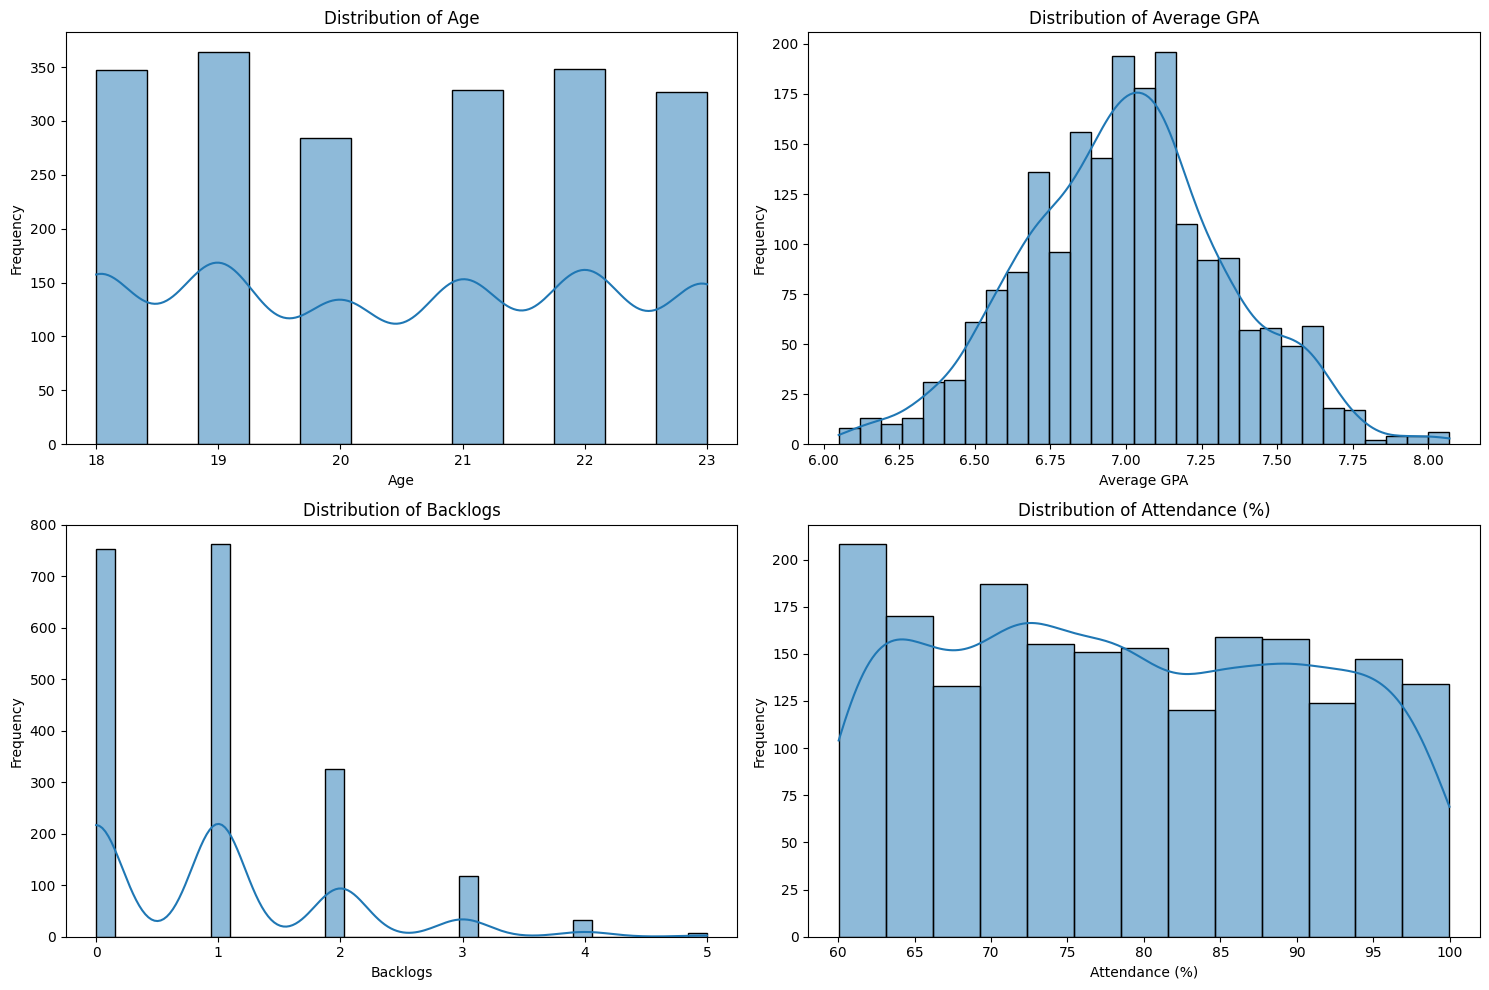

In [ ]:
# Plotting appropriate graphs to check the distribution of each of the non_binary variables

import matplotlib.pyplot as plt
import seaborn as sns

# Identify non-binary variables

non_categorical_cols = ['Age', 'Average GPA', 'Backlogs', 'Attendance (%)']

# Set up the figure and axes for plotting

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten() # Flatten the 2x2 grid for easy iteration

# Plot the distribution of each non-binary variable

for i, col in enumerate(non_categorical_cols):
    sns.histplot(df_filtered[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
# Checking the point biserial correlation between attendance,avrerage GPA and placement status

from scipy.stats import pointbiserialr, spearmanr

# Point Biserial Correlation

corr_attendance, _ = pointbiserialr(df_filtered['Attendance (%)'], df_filtered['Placement Status'])
corr_gpa, _ = pointbiserialr(df_filtered['Average GPA'], df_filtered['Placement Status'])

print(f"Point Biserial correlation between Attendance (%) and Placement Status: {corr_attendance:.4f}")
print(f"Point Biserial correlation between Average GPA and Placement Status: {corr_gpa:.4f}")

# Spearman Correlation

corr_backlogs, _ = spearmanr(df_filtered['Backlogs'], df_filtered['Placement Status'])
corr_age, _ = spearmanr(df_filtered['Age'], df_filtered['Placement Status'])

print(f"Spearman correlation between Backlogs and Placement Status: {corr_backlogs:.4f}")
print(f"Spearman correlation between Age and Placement Status: {corr_age:.4f}")


Point Biserial correlation between Attendance (%) and Placement Status: 0.0239
Point Biserial correlation between Average GPA and Placement Status: 0.0132
Spearman correlation between Backlogs and Placement Status: 0.0004
Spearman correlation between Age and Placement Status: 0.0054


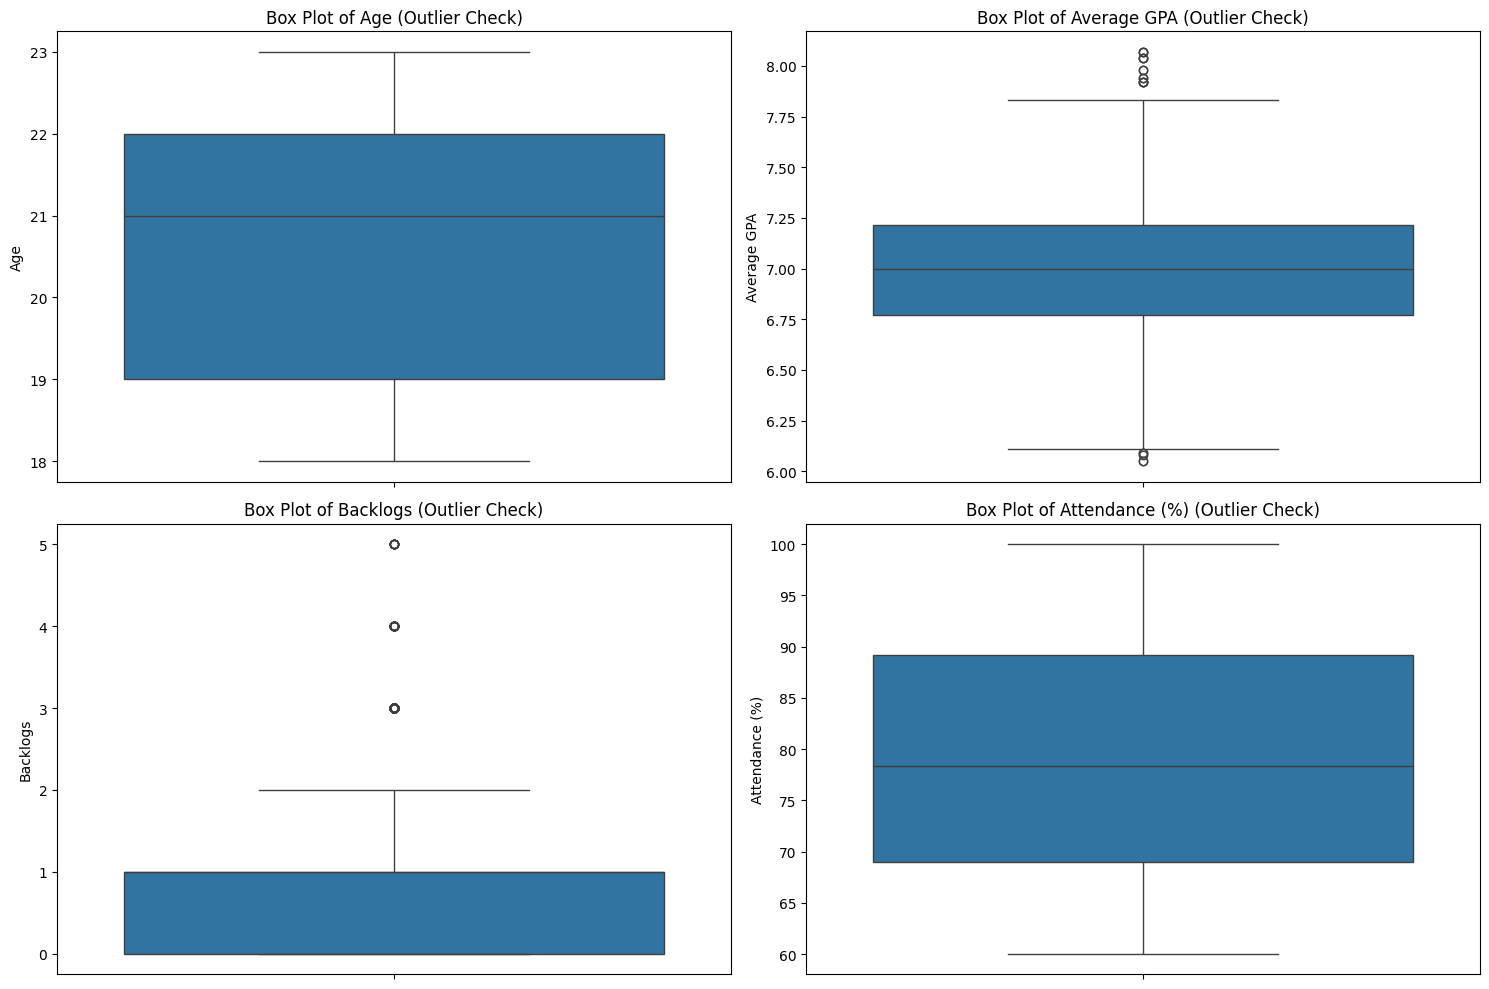

In [ ]:
# Appropriate graphs to check the outliers of each of non binary variables

import matplotlib.pyplot as plt

# Identify non-binary variables

non_categorical_cols = ['Age', 'Average GPA', 'Backlogs', 'Attendance (%)']

# Set up the figure and axes for plotting (adjusting for the number of plots)

n_cols = 2
n_rows = (len(non_categorical_cols) + n_cols - 1) // n_cols # Calculate rows needed

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 5))

# Flatten the axes array for easy iteration if there's more than one row

if n_rows > 1 or n_cols > 1:
    axes = axes.flatten()
else:
    axes = [axes] # Make it an iterable list even if there's only one plot

# Plot box plots for each non-binary variable

for i, col in enumerate(non_categorical_cols):
    sns.boxplot(y=df_filtered[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col} (Outlier Check)')
    axes[i].set_ylabel(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# applying log transformaton to reduce the impact of outliers

df_filtered['Average GPA'] = np.log1p(df_filtered['Average GPA'])

# Binning 'Backlogs' column into 3 bins

bins = [-1, 0, 2, 5]
labels = ['0', '1', '2']
df_filtered['Backlogs_Binned'] = pd.cut(df_filtered['Backlogs'], bins=bins, labels=labels, right=True, include_lowest=True)

df_filtered.drop(['Backlogs'],axis = 1, inplace = True)  #dropping original column

df_filtered

,Age,Gender,Average GPA,Attendance (%),Internship Done,Placement Status,In_Coding Club,In_Robotics,Knows_C++,Knows_Machine Learning,...,Knows_Python,Domain_Consulting,Domain_Core Engineering,Domain_Hardware,Domain_Higher Studies,Domain_None,Domain_Research,Domain_Software,Extracirricular Activities,Backlogs_Binned
0,21.0,1,2.078191,70.45,1,0,0,1,1,1,...,1,True,False,False,False,False,False,False,1,0
1,19.0,1,2.009555,65.45,0,0,1,0,1,0,...,0,False,False,False,False,True,False,False,1,0
2,19.0,0,2.089392,84.79,1,0,0,0,0,1,...,0,False,False,False,False,False,True,False,1,0
3,23.0,1,2.069391,62.26,0,1,1,0,0,0,...,1,False,False,False,False,True,False,False,0,1
4,20.0,1,2.090629,97.12,1,0,0,1,1,0,...,1,False,False,False,True,False,False,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,19.0,1,2.162173,92.45,1,0,0,1,1,0,...,0,False,False,False,False,False,False,True,1,1
1996,23.0,0,2.110213,96.35,0,0,0,0,0,1,...,0,False,False,False,False,True,False,False,1,0
1997,18.0,1,2.069391,75.32,1,0,0,0,0,0,...,0,True,False,False,False,False,False,False,1,0
1998,22.0,1,2.090629,94.20,1,1,0,0,1,0,...,1,True,False,False,False,False,False,False,1,0


In [ ]:
# Convert all boolean (True/False) columns to binary (1/0)

df_filtered = df_filtered.astype({col: 'int' for col in df_filtered.columns if df_filtered[col].dtype == 'bool'})

# Convert category type column into int type

df_filtered['Backlogs_Binned'] = df_filtered['Backlogs_Binned'].astype(int)

df_filtered.dtypes

,0
Age,float64
Gender,int64
Average GPA,float64
Attendance (%),float64
Internship Done,int64
Placement Status,int64
In_Coding Club,int64
In_Robotics,int64
Knows_C++,int64
Knows_Machine Learning,int64


In [ ]:
# final preprocessed dataset

df_filtered

,Age,Gender,Average GPA,Attendance (%),Internship Done,Placement Status,In_Coding Club,In_Robotics,Knows_C++,Knows_Machine Learning,...,Knows_Python,Domain_Consulting,Domain_Core Engineering,Domain_Hardware,Domain_Higher Studies,Domain_None,Domain_Research,Domain_Software,Extracirricular Activities,Backlogs_Binned
0,21.0,1,2.078191,70.45,1,0,0,1,1,1,...,1,1,0,0,0,0,0,0,1,0
1,19.0,1,2.009555,65.45,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,19.0,0,2.089392,84.79,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,23.0,1,2.069391,62.26,0,1,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4,20.0,1,2.090629,97.12,1,0,0,1,1,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,19.0,1,2.162173,92.45,1,0,0,1,1,0,...,0,0,0,0,0,0,0,1,1,1
1996,23.0,0,2.110213,96.35,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1997,18.0,1,2.069391,75.32,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1998,22.0,1,2.090629,94.20,1,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [ ]:
#savinfg the processed file

#df_filtered.to_csv('processed_dataset.csv')